In [3]:
pip install s3fs

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 45 kB 4.9 MB/s  eta 0:00:01
     |████████████████████████████████| 91 kB 11.5 MB/s eta 0:00:01
     |████████████████████████████████| 6.5 MB 40.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 87.2 MB/s eta 0:00:01
     |████████████████████████████████| 547 kB 85.4 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 83.5 MB/s eta 0:00:01
     |████████████████████████████████| 142 kB 81.3 MB/s eta 0:00:01
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=70649 sha256=4960cfba11e41cffc7a2d6f121f5c94a0352054250c234473041dc262c3c57d0
  Stored in directory: /home/emr-notebook/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [4]:
trump = pd.read_csv("s3://twitter-election/hashtag_donaldtrump.csv", lineterminator='\n')
biden = pd.read_csv("s3://twitter-election/hashtag_joebiden.csv", lineterminator='\n')

In [5]:
trump.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [6]:
biden.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132


In [7]:
trump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970919 entries, 0 to 970918
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            970919 non-null  object 
 1   tweet_id              970919 non-null  float64
 2   tweet                 970919 non-null  object 
 3   likes                 970919 non-null  float64
 4   retweet_count         970919 non-null  float64
 5   source                970043 non-null  object 
 6   user_id               970919 non-null  float64
 7   user_name             970903 non-null  object 
 8   user_screen_name      970919 non-null  object 
 9   user_description      869653 non-null  object 
 10  user_join_date        970919 non-null  object 
 11  user_followers_count  970919 non-null  float64
 12  user_location         675966 non-null  object 
 13  lat                   445719 non-null  float64
 14  long                  445719 non-null  float64
 15  

In [8]:
biden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776886 entries, 0 to 776885
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            776886 non-null  object 
 1   tweet_id              776886 non-null  float64
 2   tweet                 776886 non-null  object 
 3   likes                 776886 non-null  float64
 4   retweet_count         776886 non-null  float64
 5   source                776173 non-null  object 
 6   user_id               776886 non-null  float64
 7   user_name             776868 non-null  object 
 8   user_screen_name      776886 non-null  object 
 9   user_description      694880 non-null  object 
 10  user_join_date        776886 non-null  object 
 11  user_followers_count  776886 non-null  float64
 12  user_location         543095 non-null  object 
 13  lat                   355293 non-null  float64
 14  long                  355293 non-null  float64
 15  

In [10]:
# drop useless columns
trump = trump.drop(columns = ['tweet_id','collected_at','user_description','collected_at'])
biden = biden.drop(columns = ['tweet_id','collected_at','user_description','collected_at'])

In [11]:
# create columns
trump.loc[:,'candidate'] = 'trump'
biden.loc[:,'candidate'] = 'biden'

In [12]:
# combine datasets
mixed = pd.concat([trump, biden])

In [13]:
mixed.sort_values(by='created_at')
mixed.head()

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,candidate
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,2011-08-23 15:33:45,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,trump
1,2020-10-15 00:00:01,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,2011-07-08 13:12:20,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,trump
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,2007-08-26 05:56:11,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,trump
3,2020-10-15 00:00:02,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,2017-02-05 21:32:17,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,trump
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,2009-06-15 19:05:35,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,trump


### Exploratory Analysis

#### Tweet Count

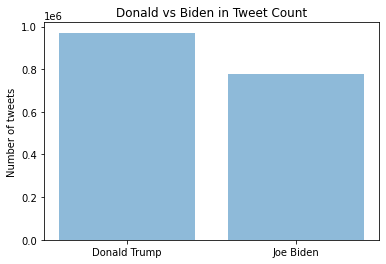

In [14]:
trump_tweets = mixed.query('(candidate == "trump")').tweet.sort_values(ascending=False).count()
biden_tweets = mixed.query('(candidate == "biden")').tweet.sort_values(ascending=False).count()

objects = ('Donald Trump','Joe Biden')
y_pos = np.arange(len(objects))
performance = [trump_tweets,biden_tweets]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of tweets')
plt.title('Donald vs Biden in Tweet Count')

plt.show()

In [15]:
trump_tweets

970919

#### Like Count

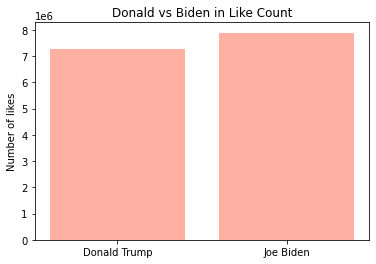

In [16]:
trump_tweets = mixed.query('(candidate == "trump")').likes.sum()
biden_tweets = mixed.query('(candidate == "biden")').likes.sum()

objects = ('Donald Trump','Joe Biden')
y_pos = np.arange(len(objects))
performance = [trump_tweets,biden_tweets]

plt.bar(y_pos, performance, align='center', alpha=0.5, color='tomato')
plt.xticks(y_pos, objects)
plt.ylabel('Number of likes')
plt.title('Donald vs Biden in Like Count')

plt.show()

In [17]:
trump_tweets

7259572.0

In [18]:
biden_tweets

7894066.0

### Retweet Count

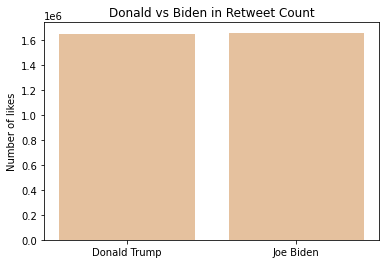

In [20]:
trump_tweets = mixed.query('(candidate == "trump")').retweet_count.sum()
biden_tweets = mixed.query('(candidate == "biden")').retweet_count.sum()

objects = ('Donald Trump','Joe Biden')
y_pos = np.arange(len(objects))
performance = [trump_tweets,biden_tweets]

plt.bar(y_pos, performance, align='center', alpha=0.5, color='peru')
plt.xticks(y_pos, objects)
plt.ylabel('Number of likes')
plt.title('Donald vs Biden in Retweet Count')

plt.show()

In [21]:
trump_tweets

1649106.0

In [22]:
biden_tweets

1655801.0

#### Average Likes Per Tweet

In [15]:
# trump
mixed.query('(candidate == "trump")').likes.sum() /  mixed.query('(candidate == "trump")').tweet.count()

7.4770109555997974

In [16]:
# biden
mixed.query('(candidate == "biden")').likes.sum() /  mixed.query('(candidate == "biden")').tweet.count()

10.161163928813236

#### Average Retweets Per Tweet

In [17]:
# trump
mixed.query('(candidate == "trump")').retweet_count.sum() /  mixed.query('(candidate == "trump")').tweet.count()

1.6985000808512347

In [18]:
# biden
mixed.query('(candidate == "biden")').retweet_count.sum() /  mixed.query('(candidate == "biden")').tweet.count()

2.131330722911727

In [37]:
class Chart_builder:
    
    def __init__(self,topic_index,number):
        super().__init__()
        self.topic_index = topic_index
        self.topics_list = ['source','country','state','continent','city']
        self.number      = number
        self.index = self.topics_list[self.topic_index]
        self.trump_tweets_sources_x = mixed.query('(candidate == "trump")').groupby(by = self.index).count().tweet.sort_values(ascending = False)[:self.number].index
        
        self.trump_tweets_sources_y = mixed.query('(candidate == "trump")').groupby(by = self.index).count().tweet.sort_values(ascending = False)[:self.number]
        
        self.biden_tweets_sources_x = mixed.query('(candidate == "biden")').groupby(by = self.index).count().tweet.sort_values(ascending = False)[:self.number].index
        
        self.biden_tweets_sources_y = mixed.query('(candidate == "biden")').groupby(by = self.index).count().tweet.sort_values(ascending = False)[:self.number]
    
    def Builder(self):
        fig = go.Figure([go.Bar(x = self.biden_tweets_sources_x, y = self.biden_tweets_sources_y, name = 'biden'),
                         go.Bar(x = self.trump_tweets_sources_x, y = self.trump_tweets_sources_y, name = 'trump')
                         ])
        # Customize aspect
        fig.update_layout(title_text = 'top '+ str(self.number) + ' ' + self.index)
        fig.update_xaxes(title = 'Sources')
        fig.update_yaxes(title = 'Tweet Count')
        fig.show()

#### Tweet Count By Top 10 Countries

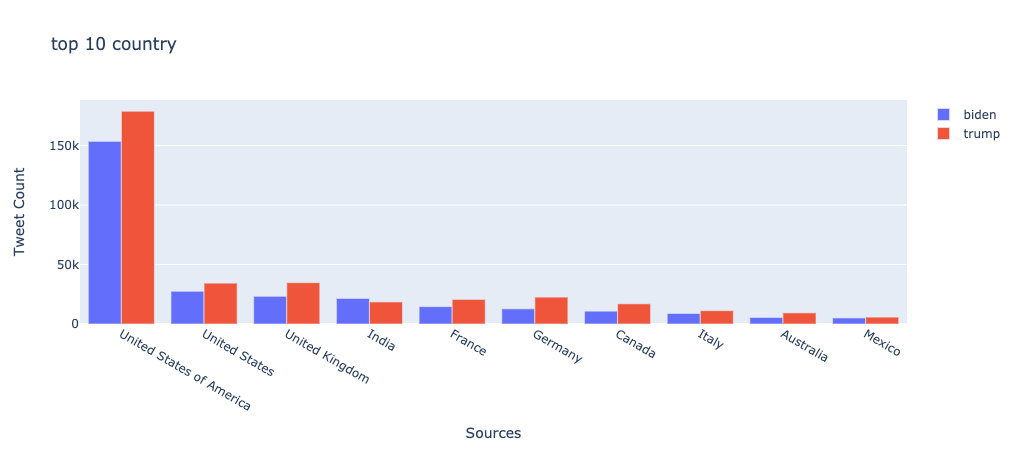

In [38]:
# choose index for topic
topic_index = 1 # from class list its country
# number of elements in chart
number = 10 # it;s mean top five

launch = Chart_builder(topic_index,number)
launch.Builder()

#### Tweet Count By Top 10 States

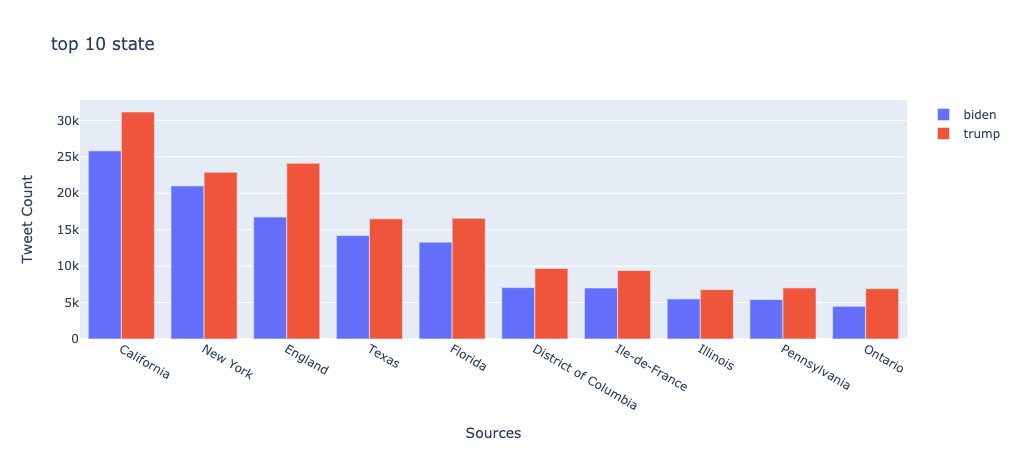

In [39]:
topic_index = 2
number = 10 
launch = Chart_builder(topic_index,number)
launch.Builder()

#### Tweet Count By Top 10 Cities

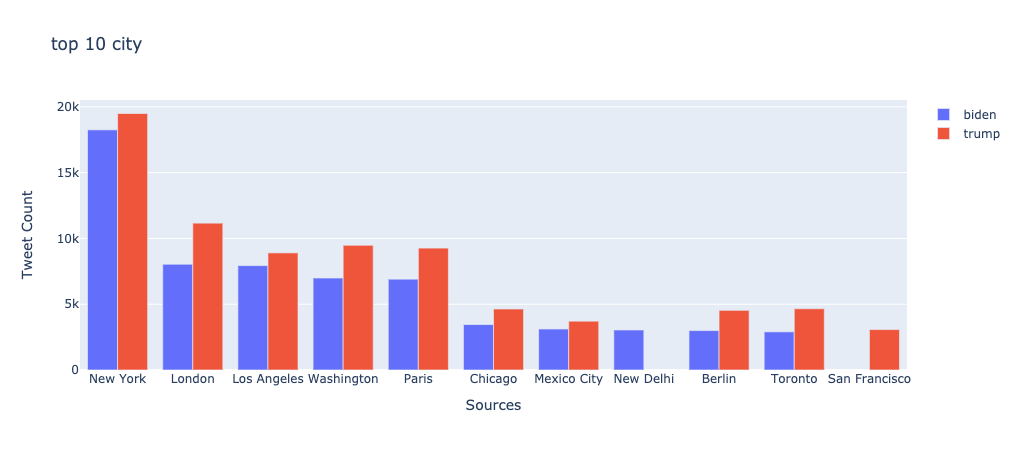

In [40]:
topic_index = 4
number = 10 
launch = Chart_builder(topic_index,number)
launch.Builder()

#### Sentiment

In [23]:
import re
def clean(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'[^\w]', ' ', text)
    return text

In [26]:
from textblob import TextBlob
# create fuction to get the subjectivity and polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
def getAnalysis(score):
    if score < 0:
        return 'negative'
    elif score==0:
        return 'neutral'
    else:
        return 'positive'

In [27]:
mixed['cleantweet'] = mixed['tweet'].apply(clean)

In [28]:
mixed['subjectivity']= mixed['cleantweet'].apply(getSubjectivity)
mixed['polarity']= mixed['cleantweet'].apply(getPolarity)
mixed['analysis']= mixed['polarity'].apply(getAnalysis)

In [29]:
mixed.query('(candidate == "trump")')['polarity'].mean()

0.0417200908181877

In [30]:
mixed.query('(candidate == "biden")')['polarity'].mean()

0.06995867510886307

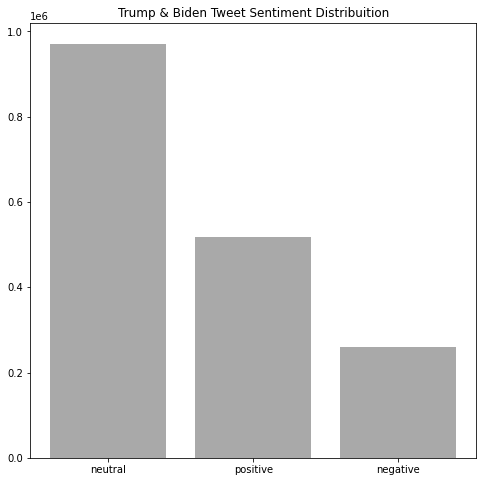

In [63]:
from collections import Counter

target_cnt = Counter(mixed.analysis)

plt.figure(figsize=(8,8))
plt.bar(target_cnt.keys(), target_cnt.values(), color='darkgrey')
plt.title("Trump & Biden Tweet Sentiment Distribuition");

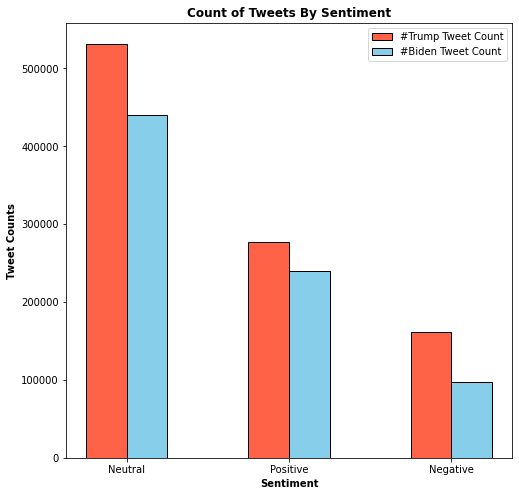

In [65]:
bar_width = 0.25
plt.subplots(figsize=(8,8))

br1 = np.arange(3) 
br2 = [x + bar_width for x in br1] 

trump_cnt = Counter(mixed.query('(candidate == "trump")').analysis)
biden_cnt = Counter(mixed.query('(candidate == "biden")').analysis)

t = plt.bar(br1, trump_cnt.values(), width = bar_width, 
            edgecolor ='black', label ='Trump', color='tomato') 
b = plt.bar(br2, biden_cnt.values(), width = bar_width, 
            edgecolor ='black', label ='Biden', color='skyblue') 

plt.xlabel('Sentiment',fontweight ='bold') 
plt.ylabel('Tweet Counts',fontweight ='bold') 
plt.xticks([r + bar_width/2 for r in range(3)],['Neutral','Positive', 'Negative'])
plt.legend([t,b],['#Trump Tweet Count','#Biden Tweet Count'])
plt.title('Count of Tweets By Sentiment',fontweight ='bold')

plt.show();

In [60]:
# Calculate relative percentages by sentiment - Trump
total_tweets_t = len(mixed.query('(candidate == "trump")').analysis)
prop_tweets_t = list(map(lambda x: round(x/total_tweets_t,2), trump_cnt.values()))

# Calculate relative percentages by sentiment - Biden
total_tweets_b = len(mixed.query('(candidate == "biden")').analysis)
prop_tweets_b = list(map(lambda x: round(x/total_tweets_b,2), biden_cnt.values()))

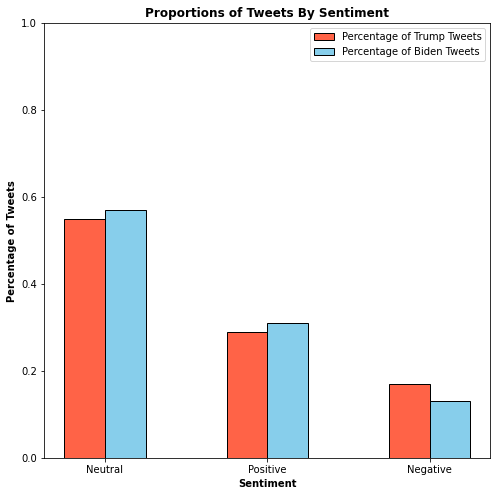

In [62]:
# Graphing relative percentages of both trump and biden tweets
bar_width = 0.25
plt.subplots(figsize=(8,8))

br1 = np.arange(3) 
br2 = [x + bar_width for x in br1] 

t = plt.bar(br1, prop_tweets_t, color ='tomato', width = bar_width, 
            edgecolor ='black', label ='Trump') 
b = plt.bar(br2, prop_tweets_b, color ='skyblue', width = bar_width, 
            edgecolor ='black', label ='Biden') 
   
plt.xlabel('Sentiment',fontweight ='bold') 
plt.ylabel('Percentage of Tweets',fontweight ='bold') 
plt.xticks([r + bar_width/2 for r in range(3)],['Neutral','Positive','Negative'])
plt.legend([t,b],['Percentage of Trump Tweets','Percentage of Biden Tweets'])
plt.ylim(0.0, 1.0)
plt.title('Proportions of Tweets By Sentiment',fontweight ='bold')

plt.show();

#### Polarity by States

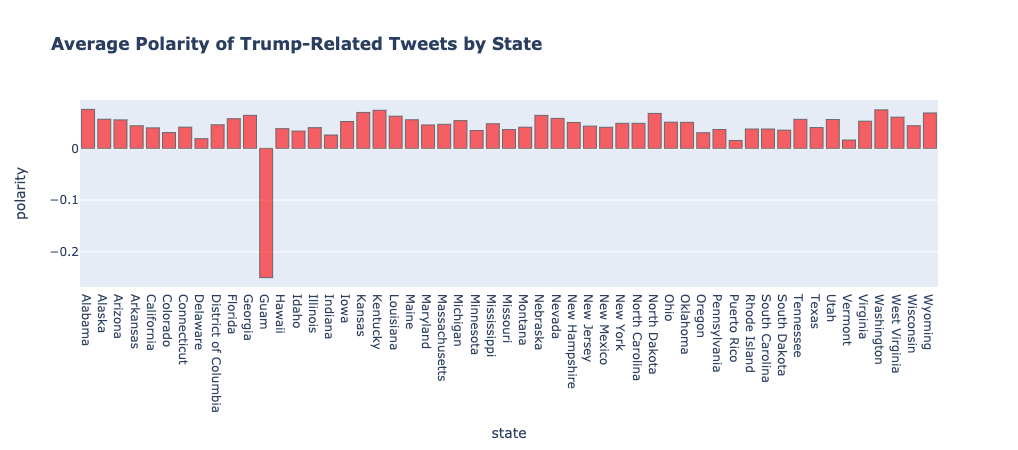

In [77]:
import plotly.express as px
# Average polarity by state (trump)
trump_state_polarity = mixed.query('(candidate == "trump" and country == "United States of America")')[['state','polarity']].groupby("state",as_index=False).mean()

fig = px.bar(trump_state_polarity, x="state", y="polarity",
            title="<b>Average Polarity of Trump-Related Tweets by State</b>")
fig.update_traces(marker=dict(color="red"),selector=dict(type="bar"),
                  marker_line_color='black', marker_line_width=0.8, opacity=0.6)
fig.show();

In [36]:
mixed.query('(state == "Guam" and candidate == "trump")')

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_join_date,user_followers_count,...,city,country,continent,state,state_code,candidate,cleantweet,subjectivity,polarity,analysis
116187,2020-10-20 23:40:05,But she was so nasty! #LeslieStahl #Trump h...,1.0,0.0,Twitter for iPhone,220561434.0,Katherine Dote,KatDote,2010-11-28 04:21:54,687.0,...,NaN,United States of America,Oceania,Guam,GU,trump,but she was so nasty lesliestahl trump,1.0,-1.0,negative
415076,2020-11-02 01:26:49,#Trump https://t.co/V2PdUnz2j6,1.0,0.0,Twitter for iPhone,245560247.0,Fella🏴‍☠️,TheFella06,2011-01-31 23:51:52,53.0,...,NaN,United States of America,Oceania,Guam,GU,trump,trump,0.0,0.0,neutral
582272,2020-11-04 08:44:03,Here on the island of #Guam voters chose Fmr V...,1.0,1.0,Twitter for iPhone,278072261.0,"NurseMark, RN, CEN",aNurseDad,2011-04-06 15:10:23,305.0,...,NaN,United States of America,Oceania,Guam,GU,trump,here on the island of guam voters chose fmr vp...,0.0,0.0,neutral
750284,2020-11-06 06:35:13,Anybody but #Trump that mf is embarrassing htt...,0.0,0.0,Twitter for iPhone,47066410.0,Sparks,RollinSparks,2009-06-14 09:44:40,176.0,...,NaN,United States of America,Oceania,Guam,GU,trump,anybody but trump that mf is embarrassing,0.0,0.0,neutral


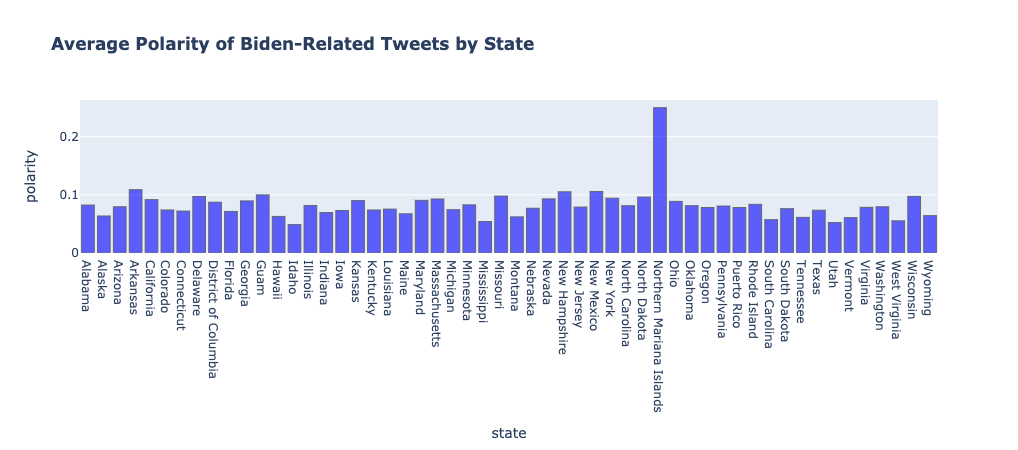

In [79]:
# Average polarity by state (biden)
biden_state_polarity = mixed.query('(candidate == "biden" and country == "United States of America")')[['state','polarity']].groupby("state",as_index=False).mean()

fig = px.bar(biden_state_polarity, x="state", y="polarity",
            title="<b>Average Polarity of Biden-Related Tweets by State</b>")
fig.update_traces(marker=dict(color="blue"),selector=dict(type="bar"),
                  marker_line_color='black', marker_line_width=0.8, opacity=0.6)
fig.show();

In [37]:
mixed.query('(state == "Northern Mariana Islands" and candidate == "biden")')

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_join_date,user_followers_count,...,city,country,continent,state,state_code,candidate,cleantweet,subjectivity,polarity,analysis
17222,2020-10-16 01:14:18,Watching #Biden is so refreshing from a leader...,4.0,0.0,TweetDeck,70156489.0,CarolinaUte,CarolinaUte,2009-08-30 16:38:03,592.0,...,NaN,United States of America,Oceania,Northern Mariana Islands,MP,biden,watching biden is so refreshing from a leaders...,0.7,0.25,positive


In [38]:
mixed.query('(state == "Arkansas" and candidate == "biden")')

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_join_date,user_followers_count,...,city,country,continent,state,state_code,candidate,cleantweet,subjectivity,polarity,analysis
71,2020-10-15 00:04:40,The reason why Twitter has locked the New York...,0.0,0.0,Twitter for iPhone,3.112087e+09,Complete Christianity,ShaneSchaetzel,2015-03-28 03:51:53,687.0,...,NaN,United States of America,North America,Arkansas,AR,biden,the reason why twitter has locked the new york...,0.602273,-0.181818,negative
933,2020-10-15 00:59:45,How many times did #Biden run for #POTUS Answe...,1.0,0.0,Twitter Web App,5.320636e+07,James Alias,jf2good,2009-07-02 22:16:42,355.0,...,NaN,United States of America,North America,Arkansas,AR,biden,how many times did biden run for potus answer ...,0.557778,0.018889,positive
984,2020-10-15 01:03:38,#HunterBiden #HunterBidenEmails Why is the pre...,0.0,0.0,Twitter Web App,5.320636e+07,James Alias,jf2good,2009-07-02 22:16:42,355.0,...,NaN,United States of America,North America,Arkansas,AR,biden,hunterbiden hunterbidenemails why is the press...,0.750000,0.375000,positive
5871,2020-10-15 11:18:54,Oh my!!!! #BidenCrimeFamily #Biden https://t.c...,0.0,0.0,Twitter for iPhone,3.308197e+09,Trump Train Conductor,OUTPOLITICKED,2015-08-06 21:40:52,2168.0,...,NaN,United States of America,North America,Arkansas,AR,biden,oh my bidencrimefamily biden,0.000000,0.000000,neutral
6047,2020-10-15 11:42:43,Wall Street certainty grows as polls show #Bid...,0.0,0.0,Twitter for iPhone,3.524312e+08,johnbufford,johnbufford,2011-08-10 16:22:14,1035.0,...,NaN,United States of America,North America,Arkansas,AR,biden,wall street certainty grows as polls show bide...,0.000000,0.000000,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764307,2020-11-08 13:58:44,#Election2020 #Biden #Trump #Media #MSM #MSNBC...,1.0,0.0,Twitter for Android,1.202162e+09,Tracy J. Horne,HorneTracy,2013-02-20 21:07:56,1098.0,...,NaN,United States of America,North America,Arkansas,AR,biden,biden trump media msm msnbc cbs foxnews abc f...,0.000000,0.000000,neutral
770755,2020-11-08 18:15:44,GOP Analyst Dick Wadhams says he believes Joe ...,1.0,0.0,Twitter for iPhone,2.533381e+09,Dillon Thomas,DillonMThomas,2014-05-29 20:58:47,2884.0,...,Fayetteville,United States of America,North America,Arkansas,AR,biden,gop analyst dick wadhams says he believes joe ...,0.536667,0.280000,positive
772439,2020-11-08 19:40:45,#Biden claimed victory over #President #Trump ...,1.0,0.0,Twitter for Android,1.202162e+09,Tracy J. Horne,HorneTracy,2013-02-20 21:07:56,1098.0,...,NaN,United States of America,North America,Arkansas,AR,biden,biden claimed victory over president trump in ...,0.300000,1.000000,positive
773168,2020-11-08 20:19:42,"Ok, so in 2016 #Trump won three big swing stat...",3.0,1.0,Twitter for iPhone,1.131564e+08,Michael Smith,msmit2010,2010-02-10 22:06:57,165.0,...,NaN,United States of America,North America,Arkansas,AR,biden,ok so in trump won three big swing states by...,0.625000,0.475000,positive


#### Polarity by Country

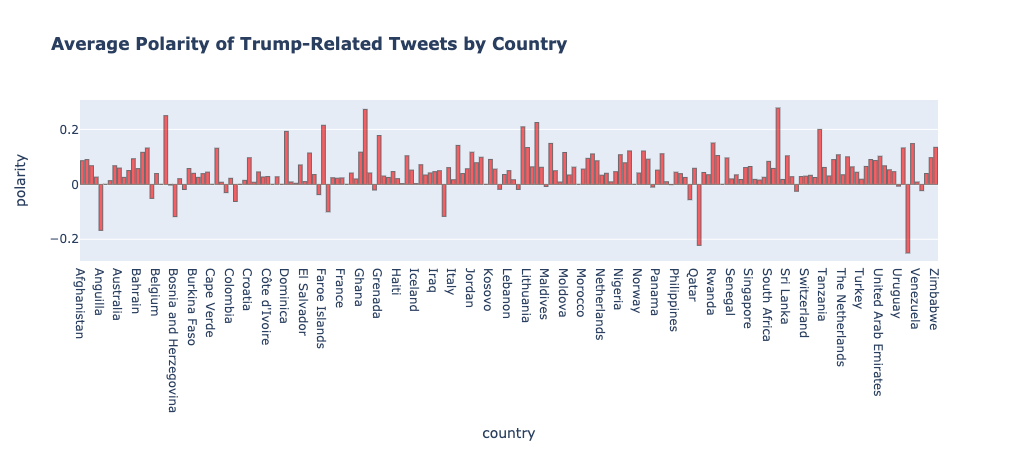

In [83]:
# Average polarity by country (trump)
trump_country_polarity = mixed.query('(candidate == "trump")')[['country','polarity']].groupby("country",as_index=False).mean()

fig = px.bar(trump_country_polarity, x="country", y="polarity",
            title="<b>Average Polarity of Trump-Related Tweets by Country</b>")
fig.update_traces(marker=dict(color="red"),selector=dict(type="bar"),
                  marker_line_color='black', marker_line_width=0.8, opacity=0.6)
fig.show();

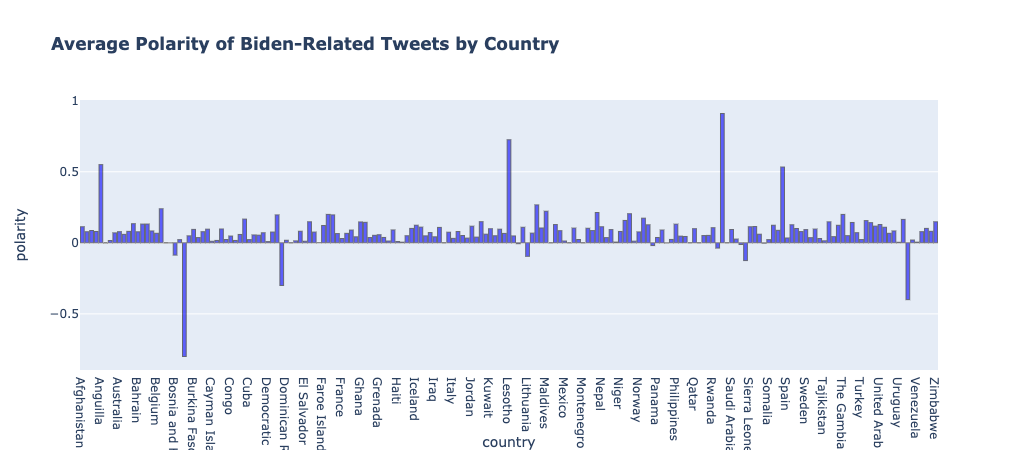

In [91]:
# Average polarity by country (biden)
biden_country_polarity = mixed.query('(candidate == "biden")')[['country','polarity']].groupby("country",as_index=False).mean()

fig = px.bar(biden_country_polarity, x="country", y="polarity",
            title="<b>Average Polarity of Biden-Related Tweets by Country</b>")
fig.update_traces(marker=dict(color="blue"),selector=dict(type="bar"),
                  marker_line_color='black', marker_line_width=0.8, opacity=0.6)
fig.show();

#### Polarity by City

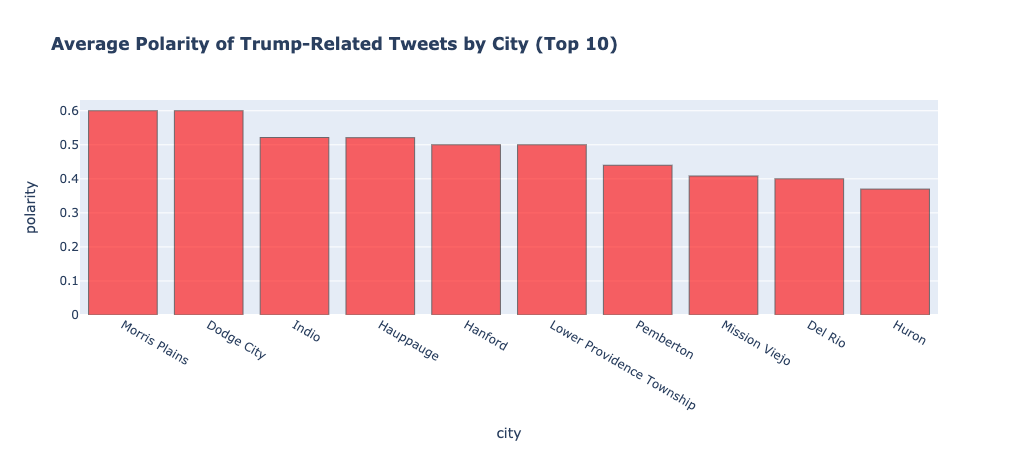

In [93]:
# Average polarity by city (trump)
trump_city_polarity = mixed.query('(candidate == "trump" and country == "United States of America" and city != "NaN")')[['city','polarity']].groupby("city",as_index=False).mean().sort_values(by='polarity',ascending = False)[:10]

fig = px.bar(trump_city_polarity, x="city", y="polarity",
            title="<b>Average Polarity of Trump-Related Tweets by City (Top 10)</b>")
fig.update_traces(marker=dict(color="red"),selector=dict(type="bar"),
                  marker_line_color='black', marker_line_width=0.8, opacity=0.6)
fig.show();

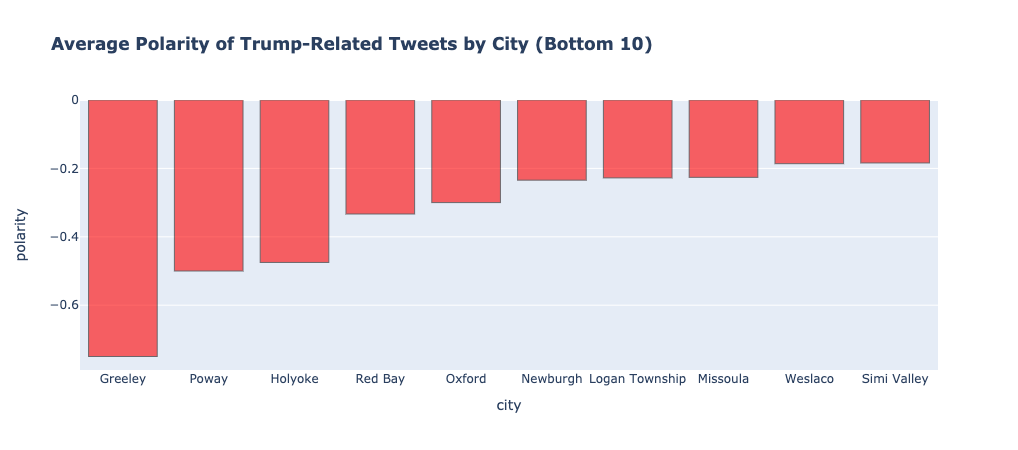

In [94]:
# Average polarity by city (trump)
trump_city_polarity = mixed.query('(candidate == "trump" and country == "United States of America" and city != "NaN")')[['city','polarity']].groupby("city",as_index=False).mean().sort_values(by='polarity',ascending = True)[:10]

fig = px.bar(trump_city_polarity, x="city", y="polarity",
            title="<b>Average Polarity of Trump-Related Tweets by City (Bottom 10)</b>")
fig.update_traces(marker=dict(color="red"),selector=dict(type="bar"),
                  marker_line_color='black', marker_line_width=0.8, opacity=0.6)
fig.show();

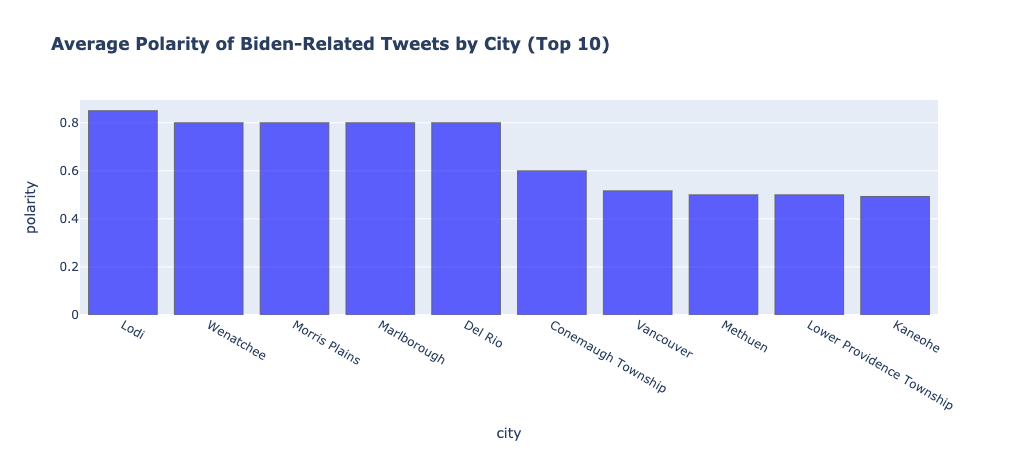

In [95]:
# Average polarity by city (biden)
biden_city_polarity = mixed.query('(candidate == "biden" and country == "United States of America" and city != "NaN")')[['city','polarity']].groupby("city",as_index=False).mean().sort_values(by='polarity',ascending = False)[:10]

fig = px.bar(biden_city_polarity, x="city", y="polarity",
            title="<b>Average Polarity of Biden-Related Tweets by City (Top 10)</b>")
fig.update_traces(marker=dict(color="blue"),selector=dict(type="bar"),
                  marker_line_color='black', marker_line_width=0.8, opacity=0.6)
fig.show();

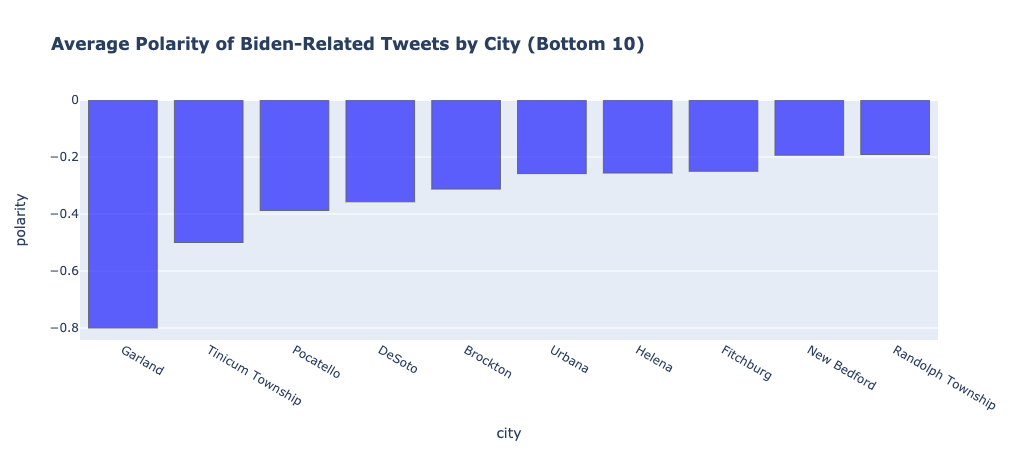

In [96]:
# Average polarity by city (biden)
biden_city_polarity = mixed.query('(candidate == "biden" and country == "United States of America" and city != "NaN")')[['city','polarity']].groupby("city",as_index=False).mean().sort_values(by='polarity',ascending = True)[:10]

fig = px.bar(biden_city_polarity, x="city", y="polarity",
            title="<b>Average Polarity of Biden-Related Tweets by City (Bottom 10)</b>")
fig.update_traces(marker=dict(color="blue"),selector=dict(type="bar"),
                  marker_line_color='black', marker_line_width=0.8, opacity=0.6)
fig.show();

#### Time Series Analysis

In [97]:
mixed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1747805 entries, 0 to 776885
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   created_at            object 
 1   tweet                 object 
 2   likes                 float64
 3   retweet_count         float64
 4   source                object 
 5   user_id               float64
 6   user_name             object 
 7   user_screen_name      object 
 8   user_join_date        object 
 9   user_followers_count  float64
 10  user_location         object 
 11  lat                   float64
 12  long                  float64
 13  city                  object 
 14  country               object 
 15  continent             object 
 16  state                 object 
 17  state_code            object 
 18  candidate             object 
 19  cleantweet            object 
 20  subjectivity          float64
 21  polarity              float64
 22  analysis              object 
dtypes: float

In [107]:
mixed['date'] = pd.to_datetime(mixed['created_at']).dt.date

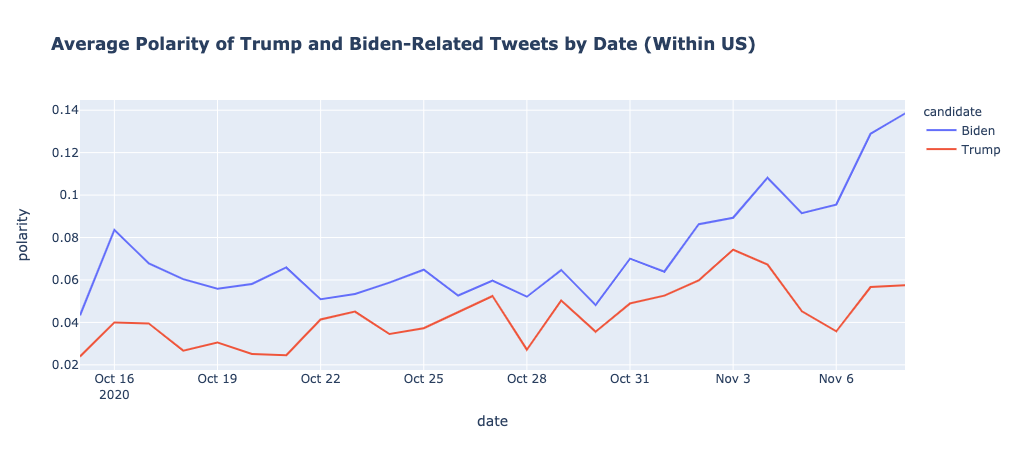

In [129]:
# Average polarity by date
trump_date_polarity = mixed.query('(candidate == "trump" and country == "United States of America")')[['date','polarity']].groupby("date",as_index=False).mean().sort_values(by='date',ascending = True)
trump_date_polarity['candidate'] = 'Trump'

biden_date_polarity = mixed.query('(candidate == "biden" and country == "United States of America")')[['date','polarity']].groupby("date",as_index=False).mean().sort_values(by='date',ascending = True)
biden_date_polarity['candidate'] = 'Biden'

date_polarity = pd.concat([biden_date_polarity, trump_date_polarity])

fig = px.line(date_polarity, x="date", y="polarity", color="candidate",
            title="<b>Average Polarity of Trump and Biden-Related Tweets by Date (Within US) </b>")
fig.update_traces(marker=dict(color="red"),selector=dict(type="bar"),
                  marker_line_color='black', marker_line_width=0.8, opacity=0.6)
fig.show();

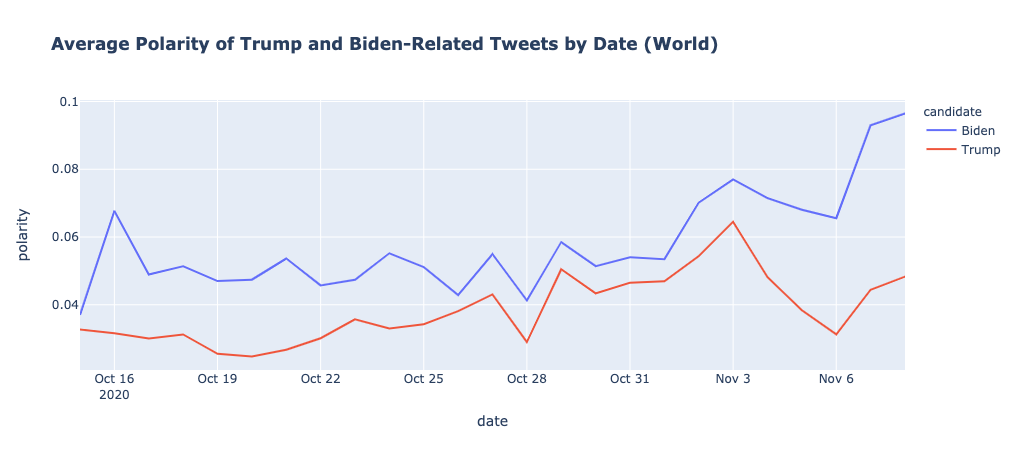

In [130]:
# Average polarity by date
trump_date_polarity = mixed.query('(candidate == "trump")')[['date','polarity']].groupby("date",as_index=False).mean().sort_values(by='date',ascending = True)
trump_date_polarity['candidate'] = 'Trump'

biden_date_polarity = mixed.query('(candidate == "biden")')[['date','polarity']].groupby("date",as_index=False).mean().sort_values(by='date',ascending = True)
biden_date_polarity['candidate'] = 'Biden'

date_polarity = pd.concat([biden_date_polarity, trump_date_polarity])

fig = px.line(date_polarity, x="date", y="polarity", color="candidate",
            title="<b>Average Polarity of Trump and Biden-Related Tweets by Date (World) </b>")
fig.update_traces(marker=dict(color="red"),selector=dict(type="bar"),
                  marker_line_color='black', marker_line_width=0.8, opacity=0.6)
fig.show();

In [131]:
trump.to_csv('s3://twitter-election/trump_clean.csv', index=True)

In [132]:
biden.to_csv('s3://twitter-election/biden_clean.csv', index=True)